# Medical Appointment No Shows Analysis

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

## 1. Problem Definition

In a statement,
>1. Using the python libraries such pandas, numpy ,matplotlib infer or draw obsevation as patients do not show up for their medical appointment

>2.  Parsing the data  : our main Target( Its the No_Show column) , we relate it to other important features to draw one or two questions and draw conclutions

## 2. Data
Originally, the dataset is available on Kaggle.https://www.kaggle.com/datasets/joniarroba/noshowappointments 


## 3. Features

This is where you'll get different infomation about each of the features in your data.You can do this via doing your own  research(such as looking at the link above or by talking to a subject matter expert(someone who knows about the dataset).

**Data Dictionary**

1. Patient Id - Identification of a patient
2. Appointment ID - Identification of each appointment
3. Gender Male or Female - Female is the greater proportion, woman takes way more care of they health in comparison to 
4. Appointment Day - The day of the actuall appointment, when they have to visit the doctor.

5. Scheduled Day - The day someone called or registered the appointment, this is before appointment of course.
6. Age - How old is the patient.

7. Neighbourhood - Where the appointment takes place.

8. Scholarship - True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

9. Hipertension - True or False

10. Diabetes - True or False
11. Alcoholism - True or False
12. Handcap - True or False
13. SMS_received -1 or more messages sent to the patient.
14. No-show - True or False



## Preparing the tools

we're going to use pandas,matplotlib and numpy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 


## Load data

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.shape

(110527, 14)

## Data Wrangling 

The goal here is to find out more about the data and become a subject matter expert on the dataset we're working with.

1. what kind of data do we have and how do we treat differnt types?
2. what's missing from the data and  how do we deal with it?
3. where are the outliers and why should you care about them?
4. How can we add, change or remove features to get more out of your data?

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.columns # checking the features

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
sum(df.duplicated())

0

In [7]:
df.isna().sum() # Checking for missing data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The above indicate there re no null value and no duplicate value

In [8]:
# From th data info,"PatientId" ,AppointmentID are  unique to the patient and  will be converted to string

df.PatientId = df.PatientId.astype('str')
df.AppointmentID  = df.AppointmentID .astype('str')
df[['PatientId','AppointmentID']].dtypes

PatientId        object
AppointmentID    object
dtype: object

In [9]:
# From th data info,ScheduledDay,AppointmentDay are str(object)  will be converted to datetime type

df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df[['ScheduledDay','AppointmentDay']].dtypes

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object

In [10]:
# Rename 'No-show' column as 'Show' and values to 1 or 0
df = df.rename(columns={"No-show": "Show"})
df['Show'] = df['Show'].replace({'No': 1, 'Yes': 0}) # 1: patient show up , 0: patient didn't show up

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  object             
 1   AppointmentID   110527 non-null  object             
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  Show          

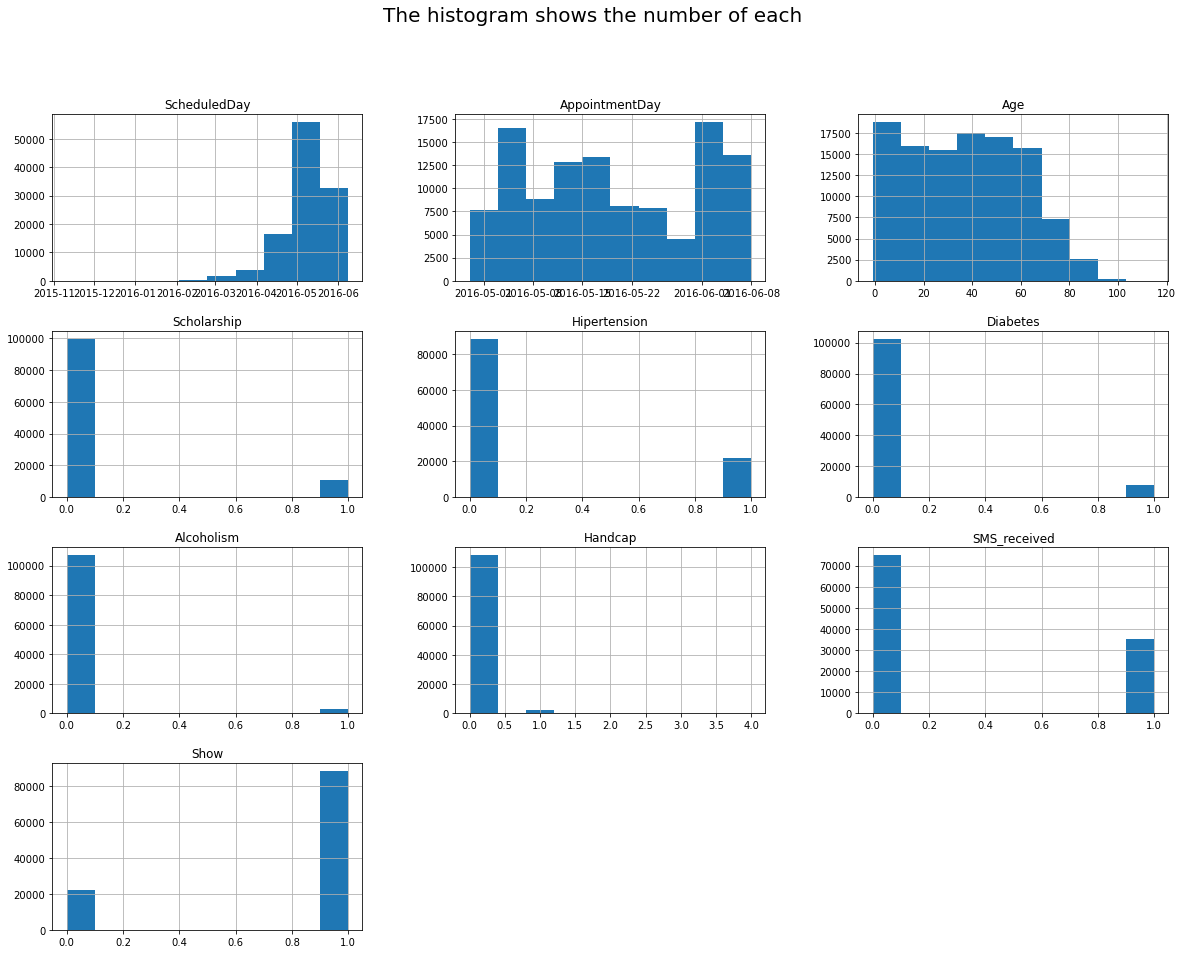

In [13]:
df.hist(figsize=(20,15))
plt.suptitle('The histogram shows the number of each', fontsize=20);

In [14]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


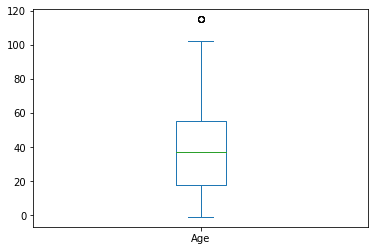

In [15]:
df.Age.plot.box();# dealing with the age anomaly

In [16]:
df[df['Age'] < 0 ] 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [17]:
# droping the negative age value 
df = df.drop([99832])

In [18]:
df[df['Age'] < 0 ] # dropping succesful


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show


## Observation

  

1. We have ages from -1 to 115, so we have a wide range of ages to investigate(negative age values  not valid that must be drop).

2. In the gender column, there are two values, F, M, while the most common is the value F, so it turns out that women are more than men

3. "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "Handcap", and "SMS_received" are encoded in form of zeros and ones, thats why it has type of int64, and appears like a continous data type.

4. 'Show' has 2 unique values `yes` or `No` and the most frequent one is 'No' which means that most of the patients show up on their appointments.



### First Analysis

* Relating the `Gender` feature to the Target (`Show`) feature : 
* To see if certain gender has more commitment to medical Appoitment than the other one?



In [19]:
df['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

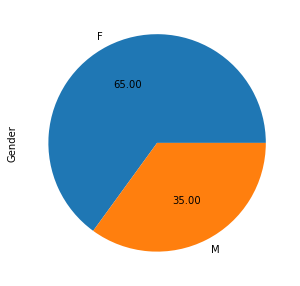

In [20]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f', figsize=(5, 5));

This shows we have more Female than Male

In [21]:
df[['Gender','Show' ]].value_counts()# Pairing Gender with Show 

Gender  Show
F       1       57245
M       1       30962
F       0       14594
M       0        7725
dtype: int64

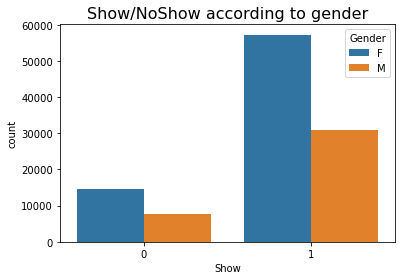

In [22]:
ax = sns.countplot(x=df.Show, hue=df.Gender, data=df)
ax.set_title("Show/NoShow according to gender", size='16')
plt.show()

In [23]:
x = df.groupby(['Gender','Show']).count()
x.head(4)

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender Show                                                                  
F      0         14594          14594         14594           14594  14594   
       1         57245          57245         57245           57245  57245   
M      0          7725           7725          7725            7725   7725   
       1         30962          30962         30962           30962  30962   

             Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
Gender Show                                                                   
F      0             14594        14594         14594     14594       14594   
       1             57245        57245         57245     57245       57245   
M      0              7725         7725          7725      7725        7725   
       1             30962        30962         30962     30962       30962   

             Handcap  SMS_received  
Gender Show                         
F      0       14594         14594  
       1       57245         57245  
M      0        7725          7725  
       1       30962         30962


Observation:

* From the bar graph the number  is high in terms of men and women, especially women more

* We need to know the comparison between the number of patients and the percentage of attendance or non-attendance



In [24]:
df_male = df[df['Gender'] == 'M'] #Male data separated from gender
df_m_count = df_male['PatientId'].count() #Calculate the number of male data

In [25]:
male_show = df_male[df_male['Show'] == 1] ##new dataframe holds male who showed up only.
male_show.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
13,911394617215919.0,5636249,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,1
16,84574392942817.0,5633121,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,1
25,5819369978796.0,5624020,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,1


In [26]:
count_m_df = male_show['Show'].value_counts() #count of males who show
count_m_df

1    30962
Name: Show, dtype: int64

In [27]:
#calculate percentage of males who attend their appointments among all males in the data
male_data = (count_m_df / df_m_count) * 100
male_data

1    80.032052
Name: Show, dtype: float64

Percentage attendance for  female

In [28]:
df_females = df[df['Gender'] == 'F']
df_f_count = df_females['PatientId'].count()

In [29]:
females_show = df_females[df_females['Show'] == 1]

In [30]:
count_f_df = females_show['Show'].value_counts()
count_f_df

1    57245
Name: Show, dtype: int64

In [31]:
females_data = count_f_df / df_f_count * 100
females_data

1    79.685129
Name: Show, dtype: float64

In [32]:
x = pd.DataFrame({"percentage of male_show": male_data,"percentage of female_show": females_data})# dataframe for comparison
x

,percentage of male_show,percentage of female_show
1,80.032052,79.685129


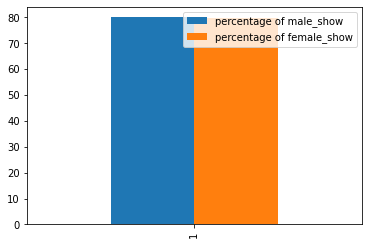

In [33]:
x.plot.bar();

### Second Analysis

* Relating the `Age` feature to the Target (`Show`) feature : 
* To see effect of AGE medical Appointment commitment



In [34]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [35]:
avg_age=df.groupby('Show')['Age'].mean()
print(avg_age)

Show
0    34.317667
1    37.790504
Name: Age, dtype: float64


In [60]:
def plot(y1,ylabel1,title):
    
    '''
    
    Function to plot  bars in one chart. 
    y1  => Average or count of the groupby function
    ylabel1 => plot y_ label
    title => chart title
    
    
    '''
    x=[1,2]
    y=y1.values
    fig=plt.figure(figsize=(8,5))
    plt.bar(x,y,width=0.3,edgecolor='red',facecolor='lightblue')
    label=['NoShow','Show']
    plt.xticks(x,label)
    plt.xlabel('Showing & Not_showing')
    plt.ylabel(ylabel1)
    plt.title(title);

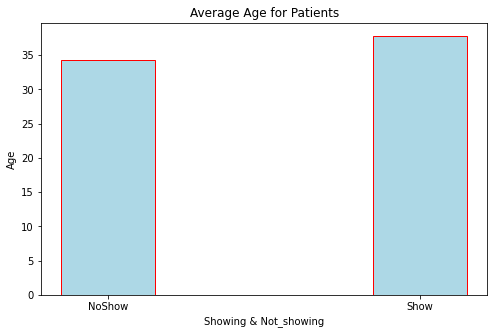

In [61]:
plot(avg_age,'Age','Average Age for Patients')#Vizualising

Observations :
    
* The the average age of patient that show up for their appoiment is 37years old 
* The average age of patient that did not show up for their appoiment is 34years old
* This implies older patient keep up with their appointment than the younger ones

### Third Analysis

* Relating the `Date` feature to the Target (`Show`) feature : 
* To see if certain Waiting days has more commitment to medical Appointment than the other one?


In [38]:
# Calculate waiting days before appointment
df['WaitingDays'] = (df.AppointmentDay.dt.date) - (df.ScheduledDay.dt.date)#.dt.date to differ only date part

In [39]:
df['WaitingDays'] = df.WaitingDays.dt.days #to convert column to numerical column contain number of days

In [40]:
df.WaitingDays.tail(10)

110517     0
110518    41
110519    41
110520    35
110521    35
110522    35
110523    35
110524    41
110525    41
110526    41
Name: WaitingDays, dtype: int64

In [41]:
avg_days = df.groupby(['Show'])['WaitingDays'].mean()
avg_days

Show
0    15.831489
1     8.754759
Name: WaitingDays, dtype: float64

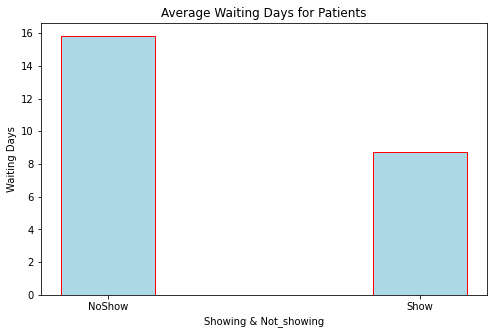

In [42]:
plot(avg_days,'Waiting Days','Average Waiting Days for Patients')#Vizualising

From above vizualisation:
   * Waiting period between 0-8 days show up more as compared to days above 8days
   * Suggest reducing patient waiting days to be less than 8days 
    

### Fouth Analysis

* Relating the `SMS_received` feature to the Target (`Show`) feature:
* To see if patients with SMS_received has more commitment to medical schedules than the other one?


In [43]:
mean_rate=df.groupby(['SMS_received'])['Show'].mean()# finding the mean of the patient that received SMS
percentage_rate=mean_rate*100 
percentage_rate

SMS_received
0    83.296466
1    72.425455
Name: Show, dtype: float64

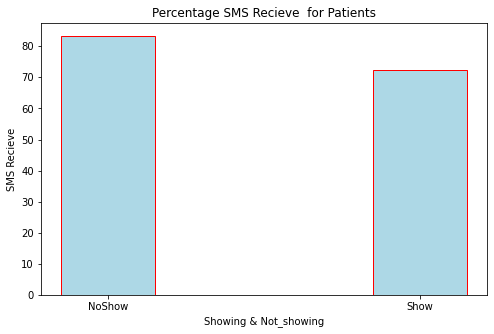

In [44]:
plot(percentage_rate,'SMS Recieve','Percentage SMS Recieve  for Patients')#Vizualising

In [45]:
total = 110526 # from df.info() total records 
SMS_received_show = df.loc[(df['SMS_received'] == 1) & (df['Show']==1)]['PatientId'].count()
SMS_received_No_show = df.loc[(df['SMS_received'] == 1) & (df['Show']==0)]['PatientId'].count()
print(f"Percentage of show ups when patients have SMS_received is {SMS_received_show*100/total:.2f}%, while not show ups is {SMS_received_No_show*100/total:.2f}%.")

Percentage of show ups when patients have SMS_received is 23.25%, while not show ups is 8.85%.


In [46]:
total = 110526
No_SMS_received_show = df.loc[(df['SMS_received'] == 0) & (df['Show']==1)]['PatientId'].count()
No_SMS_received_No_show = df.loc[(df['SMS_received'] == 0) & (df['Show']==0)]['PatientId'].count()
print(f"Percentage of show ups when patients have no SMS_received is {No_SMS_received_show*100/total:.2f}%, while not show ups is {No_SMS_received_No_show*100/total:.2f}%.")

Percentage of show ups when patients have no SMS_received is 56.56%, while not show ups is 11.34%.


In [47]:
# Comparing the outcome of Show with or without Scholarship
a=SMS_received_show*100/total
b=SMS_received_No_show*100/total
c =No_SMS_received_show*100/total
d= No_SMS_received_No_show*100/total
(a,b,c,d)

SMS = pd.DataFrame({'SMS_received':[a,b],'No_SMS_received':[c,d]}, index=[1,0])# putting it into dataframe
SMS

,SMS_received,No_SMS_received
1,23.250638,56.555923
0,8.852216,11.341223


Statistically and vizualisation:

   * Patient with SMS Received do not show up more as compared to not receiving SMS
   * Suggest more SMS should be send out as to increase the awarness

### Fifth Analysis

* Relating the `Scholarship` feature to the Target (`Show`) feature :
* To see if patients with access to Scholarship has more commitment to medical schedules than the other one?

In [48]:
Scholarship_mean_rate=df.groupby(['Scholarship'])['Show'].count()
Scholarship_mean_rate

Scholarship
0    99665
1    10861
Name: Show, dtype: int64

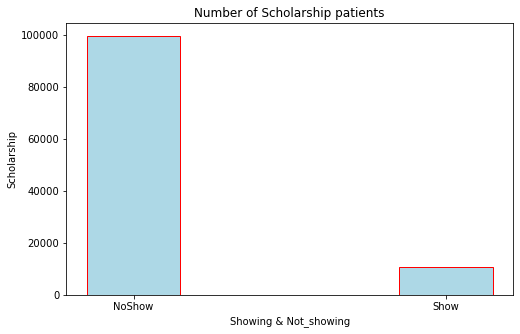

In [49]:
plot(Scholarship_mean_rate,'Scholarship','Number of Scholarship patients')# Vizualising 

In [50]:
total = 110526 # from df.info()
Scholarship_show = df.loc[(df['Scholarship'] == 1) & (df['Show']==1)]['PatientId'].count()
Scholarship_No_show = df.loc[(df['Scholarship'] == 1) & (df['Show']==0)]['PatientId'].count()
print(f"Percentage of show ups when patients have Scholarship is {Scholarship_show*100/total:.2f}%, while not show ups is {Scholarship_No_show*100/total:.2f}%.")

Percentage of show ups when patients have Scholarship is 7.49%, while not show ups is 2.33%.


In [51]:
total = 110526
No_Scholarship_show = df.loc[(df['Scholarship'] == 0) & (df['Show']==1)]['PatientId'].count()
No_Scholarship_No_show = df.loc[(df['Scholarship'] == 0) & (df['Show']==0)]['PatientId'].count()
print(f"Percentage of show ups when patients have no Scholarship is {No_Scholarship_show*100/total:.2f}%, while not show ups is {No_Scholarship_No_show*100/total:.2f}%.")

Percentage of show ups when patients have no Scholarship is 72.31%, while not show ups is 17.86%.


In [52]:
# Comparing the outcome of Show with or without Scholarship

x1=Scholarship_show*100/total
x2=Scholarship_No_show*100/total
y1 =No_Scholarship_show*100/total
y2= No_Scholarship_No_show*100/total

Scholarship= pd.DataFrame({'Scholarship':[x1,x2],'No_Scholarship':[y1,y2]}, index=[1,0]) # putting it into dataframe
Scholarship

,Scholarship,No_Scholarship
1,7.494164,72.312397
0,2.332483,17.860956


Statistically and vizualisation:

   * Patient with access to the scholarsip do not show up more as compared to not having access to Scholarship
   * Scholarship  has no effect on patient commitment to appoitment  as patient turn up more regaedless of the scholarship



### Final Analysis

* Relating the `Diseases('Hipertension','Diabetes', 'Alcoholism', 'Handcap)` feature to the Target (`Show`) feature :
* To see if patients with any of the diseases has more commitment to medical schedules than not having disease.

In [53]:
# Define: Changing datatypes of diseases columns from int to str:

dtype_list= ['Hipertension','Diabetes', 'Alcoholism', 'Handcap']
for col in dtype_list:
    df[col]=df[col].astype('str')
    
df[['Hipertension','Diabetes', 'Alcoholism', 'Handcap']].dtypes

Hipertension    object
Diabetes        object
Alcoholism      object
Handcap         object
dtype: object

In [54]:
df[['Hipertension','Diabetes', 'Alcoholism', 'Handcap']].sample(5)

,Hipertension,Diabetes,Alcoholism,Handcap
31442,0,0,0,0
19852,0,0,0,0
56401,0,0,0,0
60865,0,0,0,0
25891,0,0,0,0


In [55]:
# diseases columns (diabeats, alcoholism,etc) as they must be in only one column.

# Replace values of 0 & 1 by the name of disease:
merged= ['Hipertension','Diabetes', 'Alcoholism', 'Handcap']
for column in merged:
    df[column]= df[column].replace('0','')
    df[column]= df[column].replace('1',' ' + column)
    
df[['Hipertension','Diabetes', 'Alcoholism', 'Handcap']].sample()

,Hipertension,Diabetes,Alcoholism,Handcap
79256,,,,


In [56]:
# Merge diseases column in one column called Diseases:

df['Diseases']= df['Hipertension'] + df['Diabetes'] + df['Alcoholism'] + df['Handcap']
df['Diseases']= df['Diseases'].str.lower().map(lambda x: x.strip().replace(' ','/'))
    

df[['Hipertension','Diabetes', 'Alcoholism', 'Handcap','Diseases']].head()

,Hipertension,Diabetes,Alcoholism,Handcap,Diseases
0,Hipertension,,,,hipertension
1,,,,,
2,,,,,
3,,,,,
4,Hipertension,Diabetes,,,hipertension/diabetes


In [57]:
# Drop 'Hipertension','Diabetes', 'Alcoholism', 'Handcap' columns 

df.drop(['Hipertension','Diabetes', 'Alcoholism', 'Handcap'],axis=1,inplace=True)

df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'SMS_received',
       'Show', 'WaitingDays', 'Diseases'],
      dtype='object')

In [58]:
Diseases_count = df.groupby('Show')['Diseases'].count()
Diseases_count

Show
0    22319
1    88207
Name: Diseases, dtype: int64

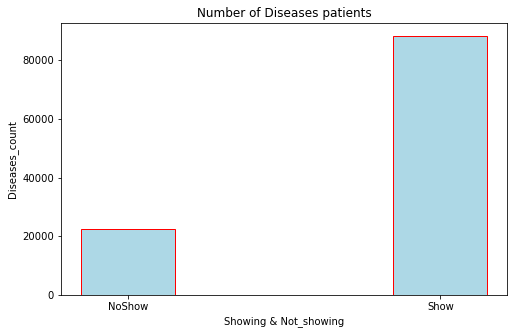

In [59]:
plot(Diseases_count,'Diseases_count','Number of Diseases patients')# Vizualising

From the above vizualisation:

   * Patient with one disease or the other show up more as compared to not having any disease

# Conclusions

### Gender and Show Analysis

* From the pie chart we see the number of female is almost twice of male

* From the bar graph the number is high in terms of men and women, especially women more

There was need  to know the comparison between the number of patients and the percentage of Show up or No show up
Doing that we arrive at:

   * percentage of Show up for male : 80.03%
   * percentage of Show up for female:79.69%
   
The above result are relatively close which implies Gender did not have an effect on showing up or not.

### Age Analysis
    
* The the average age of patient that show up for their appoiment is 37years old 
* The average age of patient that did not show up for their appoiment is 34years old
* This implies older patient keep up with their appointment than the younger ones
    

### Waiting Days Analysis

* Waiting period between 0-8 days show up more as compared to days above 8days
* As Duration increases, the ability of patients to show up on their appointments decreases.
* Suggest reducing patient waiting days to be less than 8days
    

### SMS and Show Analysis

* Patients who didn't receive the SMS showed up more than those who received it.
* Patient with SMS Received do not show up more as compared to not receiving SMS
* Suggest more SMS should be send out as to increase the awarness.


### Scholarship Analysis

* Patient with access to the scholarsip do not show up more as compared to not having access to Scholarship
* Percentage of show ups when patients have no Scholarship is 72.31%, while not show ups is 17.86%.
* Scholarship  has no effect on patient commitment to appoitment  as patient turn up more regaedless of the scholarship


### Diseases and Show Analysis

* Patients who have diseases  (Diabetes, Hypertension,Alcoholism, handicaps) are more likely to show up. than whose have not.